Task 1

In [ ]:
# Import pandas
import pandas as pd

# Define file containing dataset
runkeeper_file = '/content/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters
df_activities = pd.read_csv(runkeeper_file, parse_dates=['Date'], index_col='Date')

# First look at exported data: select sample of 3 random rows
sample_rows = df_activities.sample(3)
print(sample_rows)

# Print DataFrame summary
df_activities.info()


                                              Activity Id     Type Route Name  \
Date                                                                            
2013-11-16 09:00:24  14e9f43f-6868-41dc-9c87-48b4206330fd  Running        NaN   
2016-07-10 16:35:25  85014381-7900-49e2-88f0-42c75e0954c1  Running        NaN   
2017-04-06 19:07:46  344ece5a-187e-418e-9287-0e8a11a07643  Running        NaN   

                     Distance (km) Duration Average Pace  \
Date                                                       
2013-11-16 09:00:24           6.15    32:46         5:20   
2016-07-10 16:35:25          19.27  1:49:48         5:42   
2017-04-06 19:07:46           8.65    42:24         4:54   

                     Average Speed (km/h)  Calories Burned  Climb (m)  \
Date                                                                    
2013-11-16 09:00:24                 11.26       424.000000         21   
2016-07-10 16:35:25                 10.53      1323.999999        319   
2

Task 2

In [ ]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged', 'Route Name', 'GPX File', 'Activity Id', 'Calories Burned', 'Notes']

# Delete unnecessary columns
df_activities.drop(columns=cols_to_drop, inplace=True)

# Count types of training activities
activity_counts = df_activities['Type'].value_counts()
print(activity_counts)

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling')

# Count missing values for each column
missing_values = df_activities.isnull().sum()
print(missing_values)


Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


Task 3

In [ ]:
# Calculate sample means for heart rate for each training activity type
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

# Count missing values for each column in running data
missing_values_run = df_run.isnull().sum()
print(missing_values_run)

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


Task 4

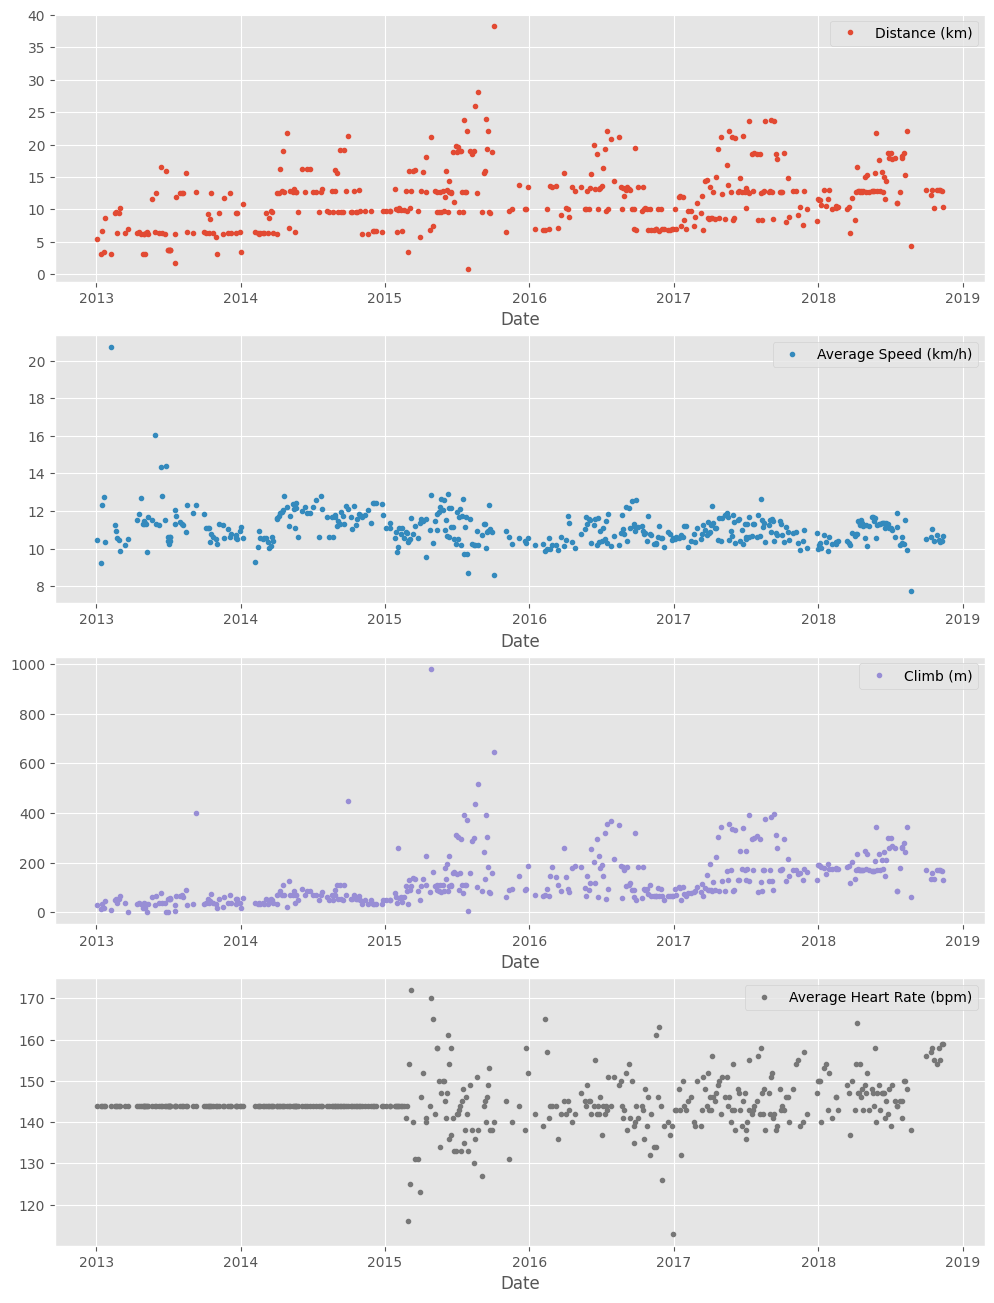

In [ ]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Ensure the DataFrame is sorted by the date index
df_run.sort_index(inplace=True)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2013':'2018']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

# Show plot
plt.show()

Task 5

In [ ]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2015':'2018']

# Exclude non-numeric columns and columns with string values representing time
numeric_cols = ['Distance (km)', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)']

# Calculate annual statistics
print('How my average run looks in last 4 years:')
annual_stats = runs_subset_2015_2018[numeric_cols].resample('A').mean()
display(annual_stats)

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
weekly_stats = runs_subset_2015_2018[numeric_cols].resample('W').mean()
display(weekly_stats)

# Mean weekly counts
weekly_counts = runs_subset_2015_2018['Distance (km)'].resample('W').count()
weekly_counts_average = weekly_counts.mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-01-04,9.780000,11.120000,51.0,144.0
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,9.780000,11.230000,51.0,144.0
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,9.893333,10.423333,58.0,144.0
...,...,...,...,...
2018-10-14,12.620000,10.840000,146.5,157.5
2018-10-21,10.290000,10.410000,133.0,155.0
2018-10-28,13.020000,10.730000,170.0,154.0


How many trainings per week I had on average: 1.5


Task 6

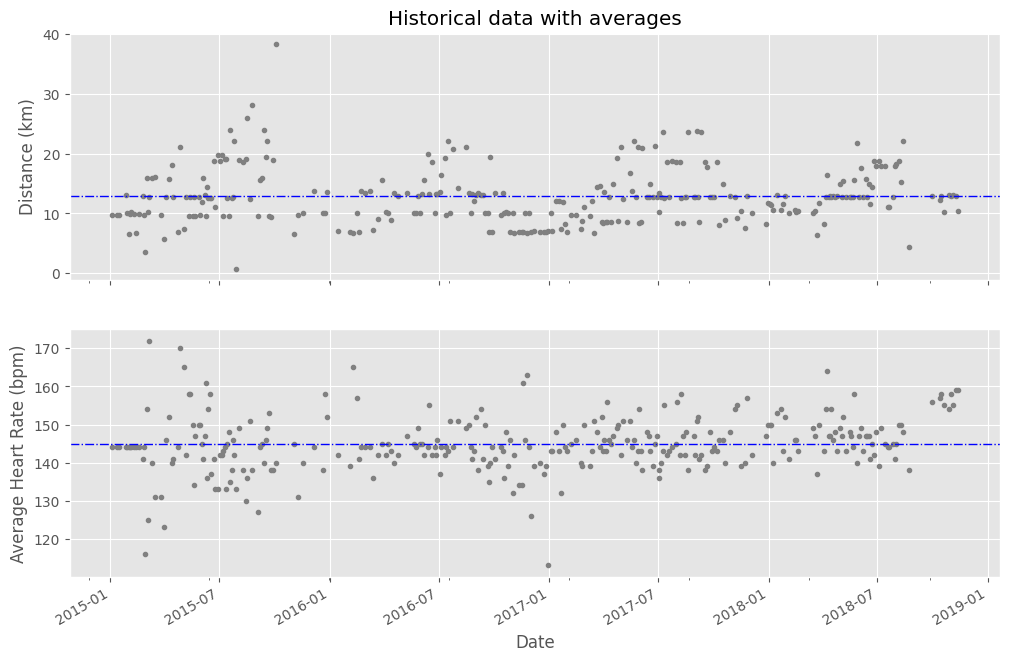

In [ ]:
# Prepare data
runs_subset_2015_2018 = df_run['2015':'2018']  # Correct order: from earlier to later date
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Plot and customize first subplot
runs_distance.plot(ax=ax1, color='gray', marker='o', linestyle='none', markersize=3)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray', marker='o', linestyle='none', markersize=3)
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.show()

Task 7

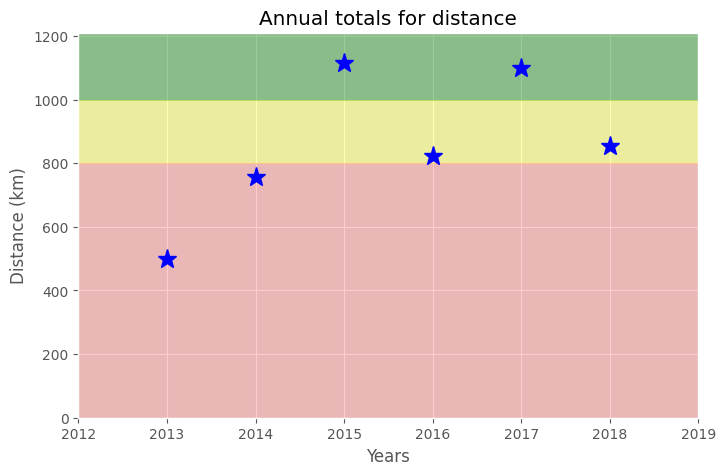

In [ ]:
# Assuming the previous tasks have been completed and df_run is already defined
# If df_run is not defined, load and prepare it as shown previously

# Prepare data: Subset the data from 2013 through 2018 and calculate annual totals
df_run_dist_annual = df_run['2013':'2018'].resample('A')['Distance (km)'].sum()

# Create plot
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210],
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

# Show plot
plt.show()


Task 8

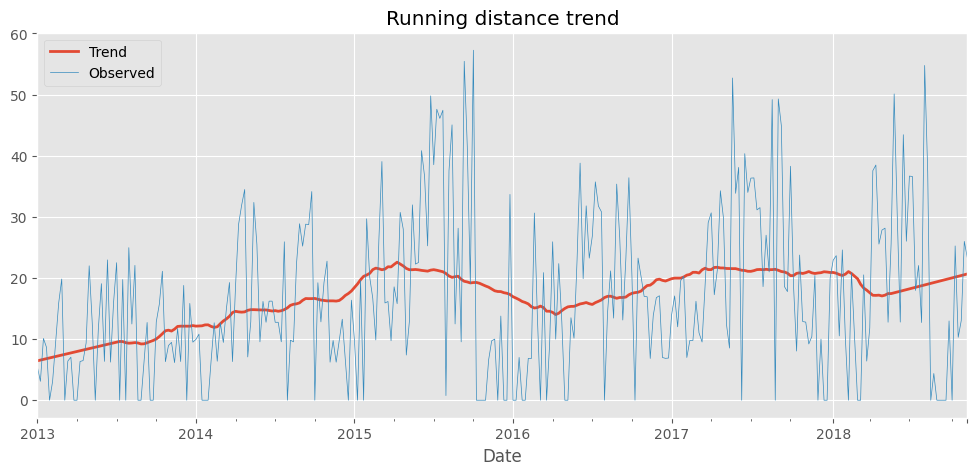

In [ ]:
# Import required library
import statsmodels.api as sm

# Prepare data: Subset the data from 2013 through 2018, select Distance (km), resample weekly, and fill NaN values
df_run_dist_wkly = df_run['2013':'2018'].resample('W')['Distance (km)'].sum().fillna(method='bfill')

# Apply seasonal decomposition
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

# Create plot
fig = plt.figure(figsize=(12, 5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
decomposed.observed.plot(ax=ax, label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()


Task 9

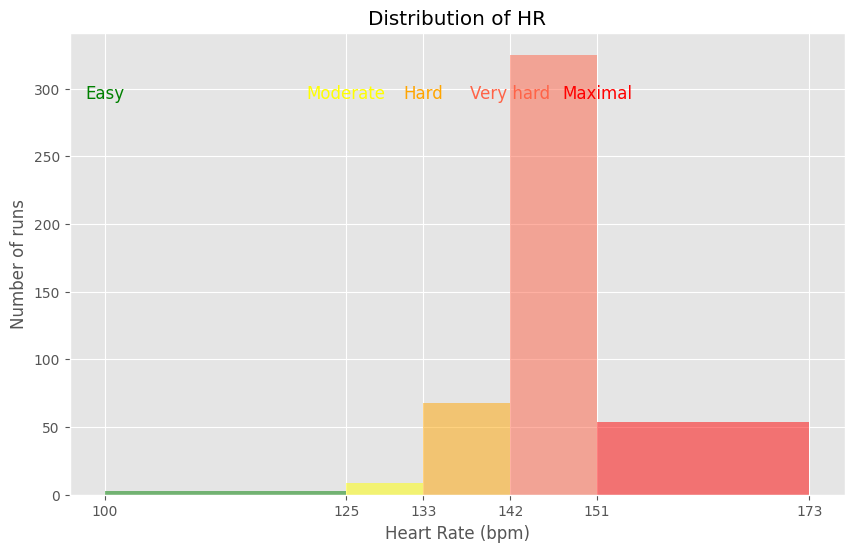

In [ ]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']

# Assuming df_run_hr_all contains 'Average Heart Rate (bpm)' column from df_run DataFrame
df_run_hr_all = df_run['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs', xlabel='Heart Rate (bpm)')
ax.xaxis.set(ticks=hr_zones)

# Adding zone names as text labels
for zone_name, zone_color, bin in zip(zone_names, zone_colors, bins):
    ax.text(bin, max(n) * 0.9, zone_name, color=zone_color, fontsize=12, ha='center')

# Show plot
plt.show()

Task 10

In [ ]:
# Concatenating three DataFrames
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle])

# Define columns for distance, climb, and speed
dist_climb_cols = ['Distance (km)', 'Climb (m)']
speed_col = ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[(i, 'total')] = df_totals[i]

print('Summary statistics for different training types:')
display(df_summary)

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Distance (km)                                                       \
                count       mean       std    min     25%     50%      75%   
Type                                                                         
Cycling          29.0  23.468276  9.451040  11.41  15.530  20.300  29.4000   
Running         459.0  11.382353  4.937853   0.76   7.415  10.810  13.1900   
Walking          18.0   1.858333  0.880055   1.22   1.385   1.485   1.7875   

               Climb (m)              ... Average Speed (km/h)             \
           max     count        mean  ...                count       mean   
Type                                  ...                                   
Cycling  49.18      29.0  240.551724  ...                 29.0  19.125172   
Running  38.32     459.0  124.788671  ...                459.0  11.056296   
Walking   4.29      18.0   19.388889  ...                 18.0   5.549444   

                                                        Distance (km)  \
              std    min     25%    50%      75%    max         total   
Type                                                                    
Cycling  3.257100  11.38  16.980  19.50  21.4900  24.33        680.58   
Running  0.953273   5.77  10.495  10.98  11.5200  20.72       5224.50   
Walking  1.459309   1.04   5.555   5.97   6.5125   6.91         33.45   

        Climb (m)  
            total  
Type               
Cycling      6976  
Running     57278  
Walking       349  

[3 rows x 26 columns]

In [ ]:
# Define average lifetime distance a pair of running shoes can cover (in km)
average_shoes_lifetime_km = 500

# Define Forrest Gump's total run distance (in km)
# Assuming Forrest Gump ran 19,024 miles (as per the movie), converting to km:
forrest_run_distance_km = 19024 * 1.60934

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = forrest_run_distance_km / average_shoes_lifetime_km

print('Forrest Gump would need {} pairs of shoes!'.format(int(shoes_for_forrest_run)))


Forrest Gump would need 61 pairs of shoes!


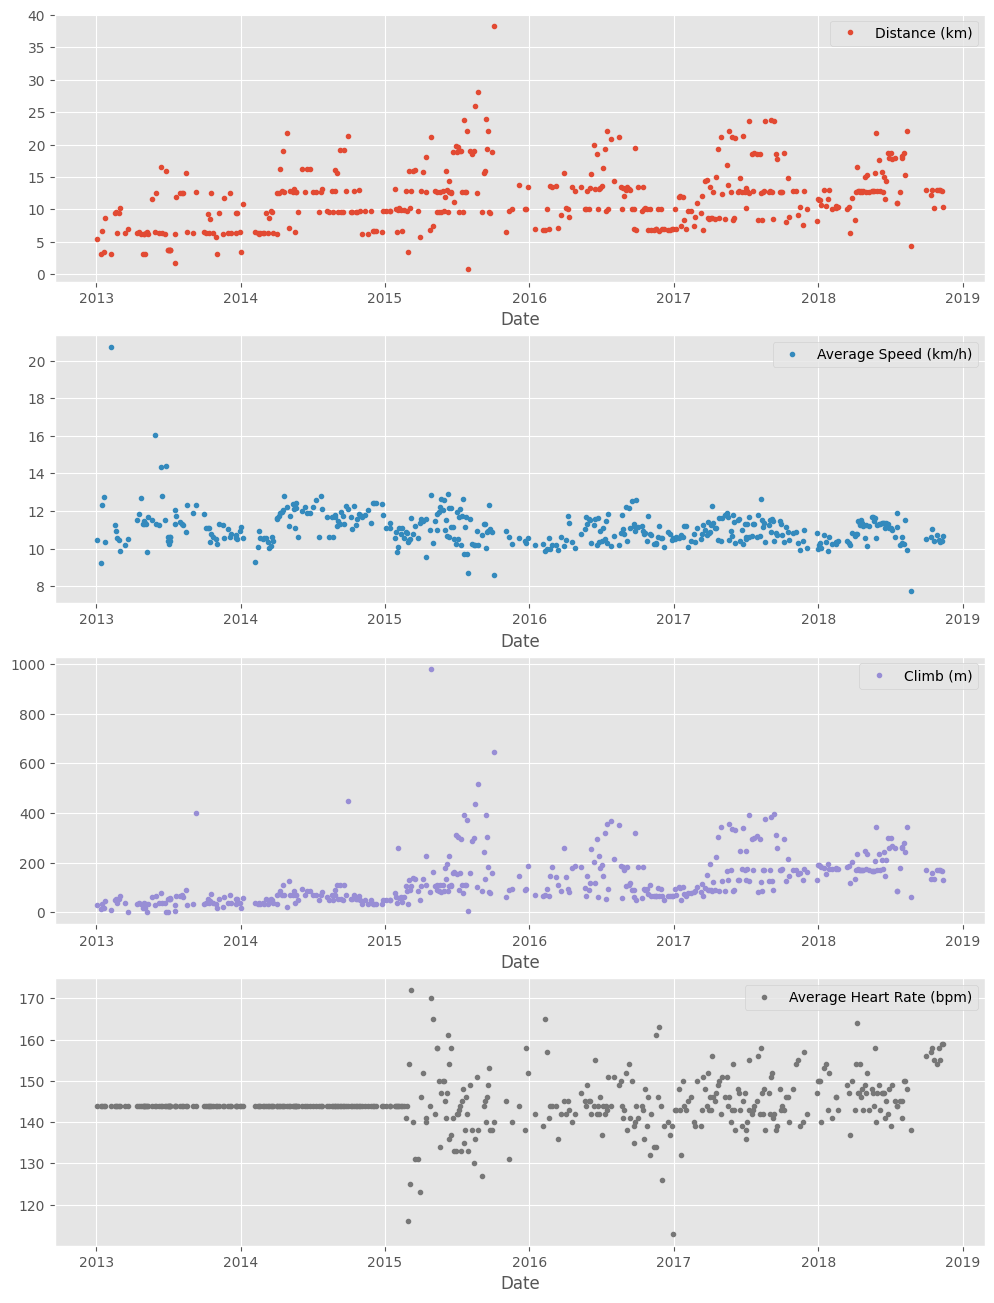

In [ ]:
runs_subset_2013_2018.plot(subplots=True, sharex=False, figsize=(12,16), linestyle='none', marker='o', markersize=3)
plt.show()


In [ ]:
annual_stats = runs_subset_2015_2018[numeric_cols].resample('A').mean()
weekly_stats = runs_subset_2015_2018[numeric_cols].resample('W').mean()
print (annual_stats)
print (weekly_stats)


            Distance (km)  Average Speed (km/h)   Climb (m)  \
Date                                                          
2015-12-31      13.602805             10.998902  160.170732   
2016-12-31      11.411667             10.837778  133.194444   
2017-12-31      12.935176             10.959059  169.376471   
2018-12-31      13.339063             10.777969  191.218750   

            Average Heart Rate (bpm)  
Date                                  
2015-12-31                143.353659  
2016-12-31                143.388889  
2017-12-31                145.247059  
2018-12-31                148.125000  
            Distance (km)  Average Speed (km/h)  Climb (m)  \
Date                                                         
2015-01-04       9.780000             11.120000       51.0   
2015-01-11            NaN                   NaN        NaN   
2015-01-18       9.780000             11.230000       51.0   
2015-01-25            NaN                   NaN        NaN   
2015-02-01     

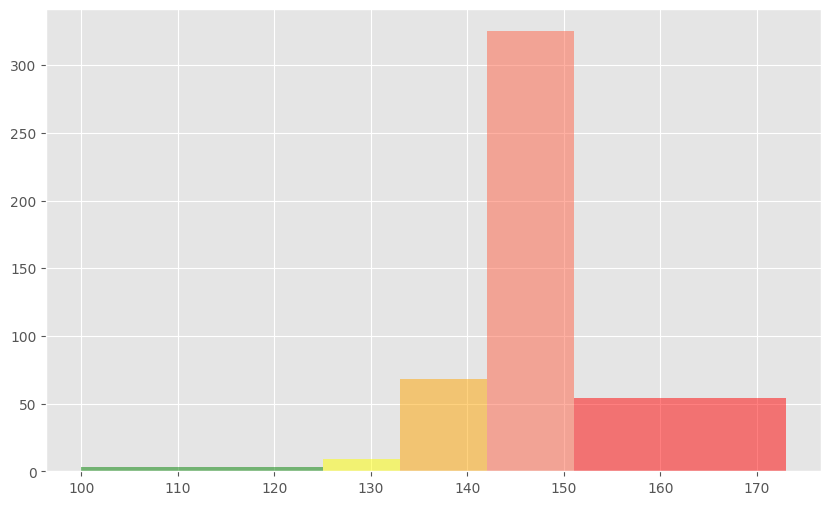

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])
plt.show()


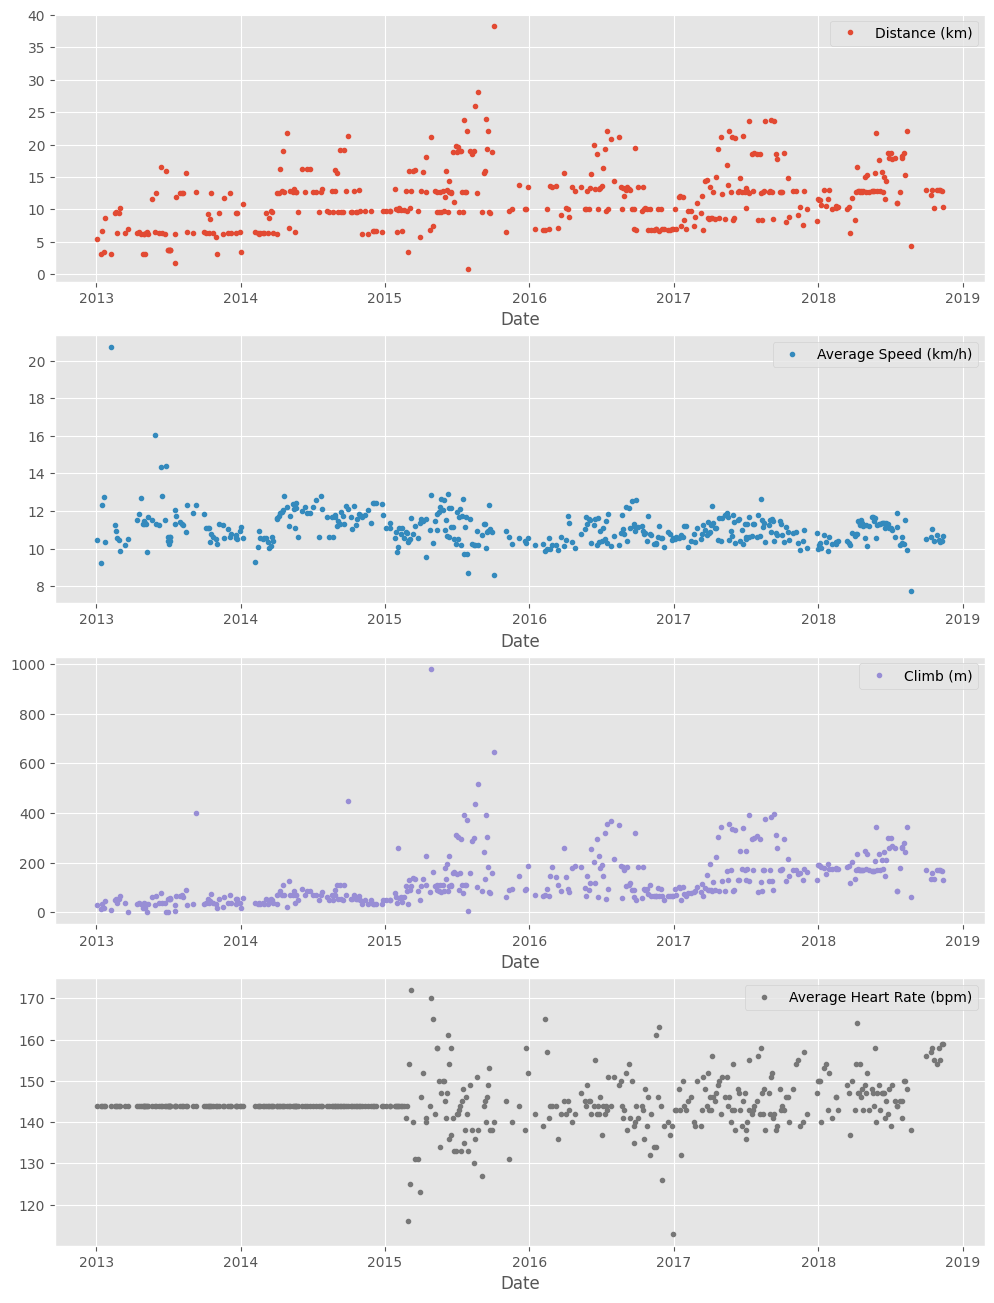

In [ ]:
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by the date index
df_run.sort_index(inplace=True)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2013':'2018']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3)
plt.show()


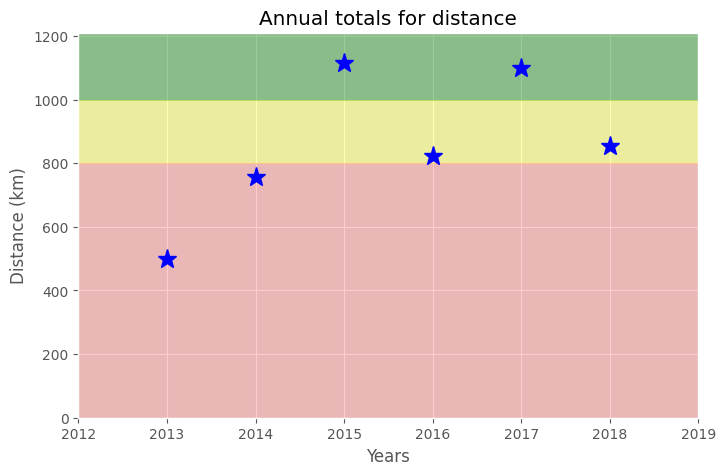

In [ ]:
# Assuming the previous tasks have been completed and df_run is already defined

# Prepare data: Subset the data from 2013 through 2018 and calculate annual totals
df_run_dist_annual = df_run['2013':'2018'].resample('A')['Distance (km)'].sum()

# Create plot
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210],
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

# Show plot
plt.show()


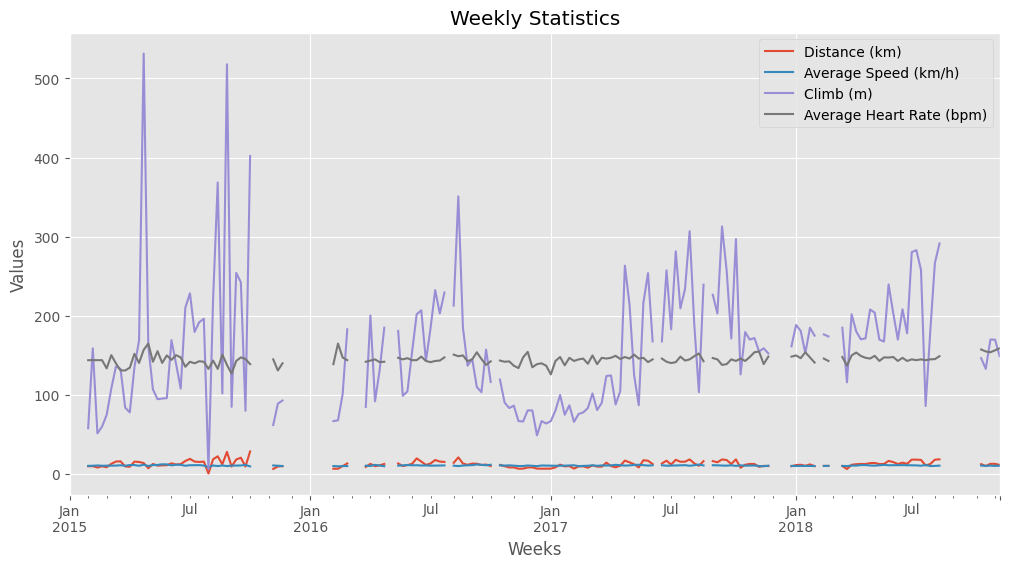

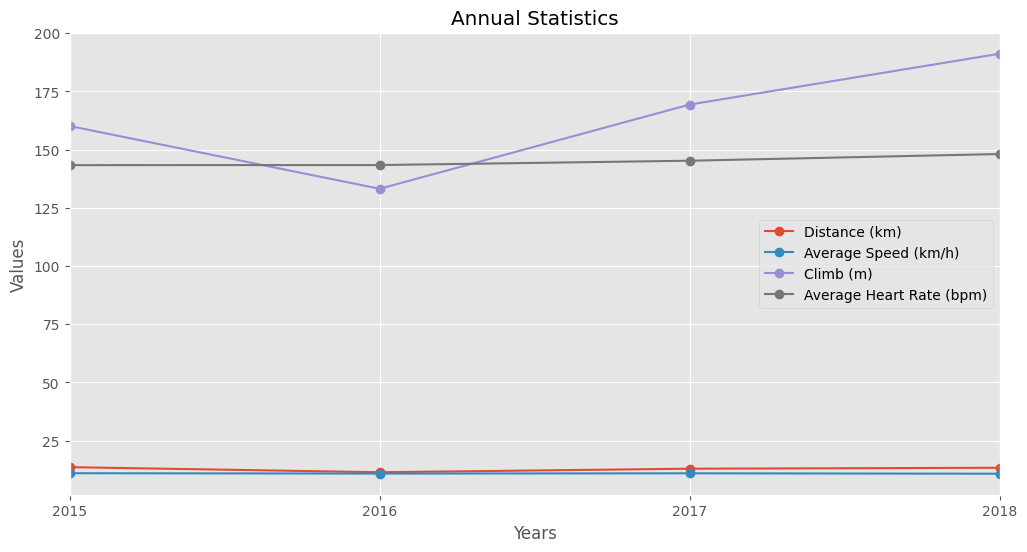

Weekly Statistics:
        Distance (km)  Average Speed (km/h)   Climb (m)  \
count     169.000000            169.000000  169.000000   
mean       12.518176             10.835473  158.325444   
std         4.000212              0.585104   80.903146   
min         0.760000              7.750000    6.000000   
25%         9.990000             10.500000   93.000000   
50%        12.193333             10.840000  157.333333   
75%        14.930000             11.180000  200.500000   
max        28.630000             12.430000  531.500000   

       Average Heart Rate (bpm)  
count                169.000000  
mean                 144.801775  
std                    6.111480  
min                  126.000000  
25%                  142.000000  
50%                  145.000000  
75%                  148.000000  
max                  165.000000  
Annual Statistics:
        Distance (km)  Average Speed (km/h)   Climb (m)  \
count       4.000000              4.000000    4.000000   
mean       12.8

In [ ]:
# Calculate weekly and annual statistics
numeric_cols = ['Distance (km)', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)']

# Weekly statistics
weekly_stats = runs_subset_2015_2018[numeric_cols].resample('W').mean()

# Annual statistics
annual_stats = runs_subset_2015_2018[numeric_cols].resample('A').mean()

# Plotting weekly statistics
fig, ax = plt.subplots(figsize=(12, 6))
weekly_stats.plot(ax=ax)
ax.set_title('Weekly Statistics')
ax.set_ylabel('Values')
ax.set_xlabel('Weeks')
plt.show()

# Plotting annual statistics
fig, ax = plt.subplots(figsize=(12, 6))
annual_stats.plot(ax=ax, marker='o')
ax.set_title('Annual Statistics')
ax.set_ylabel('Values')
ax.set_xlabel('Years')
plt.show()

# Print statistics for interpretation
print("Weekly Statistics:\n", weekly_stats.describe())
print("Annual Statistics:\n", annual_stats.describe())


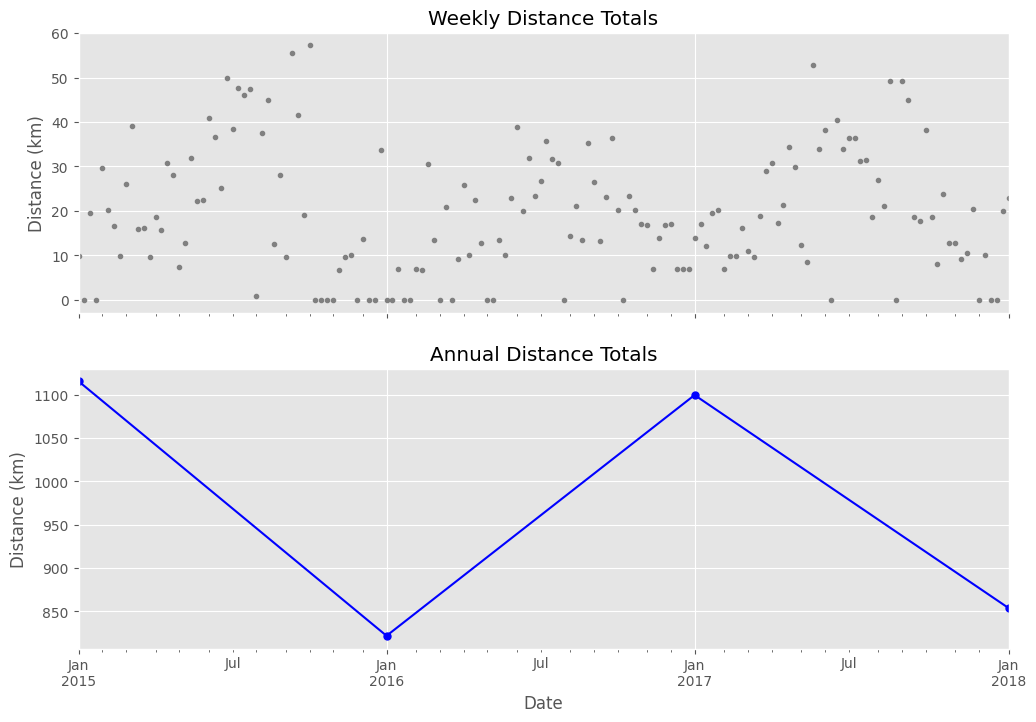

Weekly Distance Totals:
 count    202.000000
mean      19.258713
std       14.280139
min        0.000000
25%        9.527500
50%       17.865000
75%       28.817500
max       57.260000
Name: Distance (km), dtype: float64
Annual Distance Totals:
 count       4.000000
mean      972.565000
std       156.447657
min       821.640000
25%       845.685000
50%       976.595000
75%      1103.475000
max      1115.430000
Name: Distance (km), dtype: float64


In [ ]:
# Plotting weekly and annual distance totals
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Weekly distance totals
weekly_counts = runs_subset_2015_2018['Distance (km)'].resample('W').sum()
weekly_counts.plot(ax=ax1, color='gray', marker='o', linestyle='none', markersize=3)
ax1.set(ylabel='Distance (km)', title='Weekly Distance Totals')

# Annual distance totals
annual_totals = runs_subset_2015_2018['Distance (km)'].resample('A').sum()
annual_totals.plot(ax=ax2, color='blue', marker='o', linestyle='-', markersize=5)
ax2.set(xlabel='Date', ylabel='Distance (km)', title='Annual Distance Totals')

plt.show()

# Print summary
print("Weekly Distance Totals:\n", weekly_counts.describe())
print("Annual Distance Totals:\n", annual_totals.describe())
